# Visualizations

This is a seperate notebook from the visualizations we will do after running the machine learning with *sklearn*. 

Some ideas:
   * Graph the number of articles over time. We will need to use the file: *Merged Events_Sentiment.*
   * Track the sentiment over time data. We have one year of pre-civil war articles. It could be interesting to if the sentiment changes dramatically once the war begins (I would expect that it would if our corpus is doing a good job). If there are spikes in sentiment, try and match it to a given event. The *Merged Events_Sentiment.csv* might be useful or the *Final_Clean_Data.csv* data set. 
   * Combine the two graphs above together
   * **Any other ideas list them here**
   

In [2]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
from numpy import nan
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

sns.set_context('notebook')
sns.set_style('whitegrid')

In [85]:
# Import csv as a dataframe
path = "/Users/laurieottehenning/Documents/Georgetown Data Science /Capstone/Final Data Set"
os.chdir(path)
df = pd.read_csv('Final_Clean_Data.csv')

In [86]:
# Convert to date time
df['Date'] = pd.to_datetime(df.Date)
df.columns

Index(['Unnamed: 0', 'Date', 'EventID', 'FinalRating', 'Day of Week',
       'Weekend Flag', 'year', 'month', 'Value_Average_Past_30_days', 'lag_30',
       'Value_Average_Past_14_days', 'lag_14', 'Value_Average_Past_7_days',
       'lag_7', 'Middle East lagpub_7', 'Other lagpub_7', 'UK lagpub_7',
       'US lagpub_7', 'Middle East lagpub_14', 'Other lagpub_14',
       'UK lagpub_14', 'US lagpub_14', 'Middle East lagpub_30',
       'Other lagpub_30', 'UK lagpub_30', 'US lagpub_30'],
      dtype='object')

In [41]:
# Fill the null values with mean
cols = ['Value_Average_Past_30_days', 'lag_30',
       'Value_Average_Past_14_days', 'lag_14', 'Value_Average_Past_7_days',
       'lag_7', 'Middle East lagpub_7', 'Other lagpub_7', 'UK lagpub_7',
       'US lagpub_7', 'Middle East lagpub_14', 'Other lagpub_14',
       'UK lagpub_14', 'US lagpub_14', 'Middle East lagpub_30',
       'Other lagpub_30', 'UK lagpub_30', 'US lagpub_30']

for i in cols:
    df[i] = df[i].fillna(df[i].mean())

df.isnull().sum()

Unnamed: 0                       0
Date                             0
EventID                       1824
FinalRating                      0
Day of Week                      0
Weekend Flag                     0
year                             0
month                            0
Value_Average_Past_30_days       0
lag_30                           0
Value_Average_Past_14_days       0
lag_14                           0
Value_Average_Past_7_days        0
lag_7                            0
Middle East lagpub_7             0
Other lagpub_7                   0
UK lagpub_7                      0
US lagpub_7                      0
Middle East lagpub_14            0
Other lagpub_14                  0
UK lagpub_14                     0
US lagpub_14                     0
Middle East lagpub_30            0
Other lagpub_30                  0
UK lagpub_30                     0
US lagpub_30                     0
dtype: int64

In [42]:
df.head(5)

,Unnamed: 0,Date,EventID,FinalRating,Day of Week,Weekend Flag,year,month,Value_Average_Past_30_days,lag_30,...,UK lagpub_7,US lagpub_7,Middle East lagpub_14,Other lagpub_14,UK lagpub_14,US lagpub_14,Middle East lagpub_30,Other lagpub_30,UK lagpub_30,US lagpub_30
0,0,2010-01-03,NaN,5.0,Sunday,1,2010.0,1.0,-0.010683,-0.020080,...,-0.010505,-0.020080,-0.006880,-0.010605,-0.010450,-0.020080,-0.006946,-0.010460,-0.010454,-0.020080
1,1,2010-01-04,NaN,5.0,Monday,0,2010.0,1.0,-0.020080,0.006581,...,0.033242,-0.014568,-0.006880,-0.010605,0.033242,-0.014494,-0.006946,-0.010460,0.033242,-0.014435
2,2,2010-01-08,NaN,5.0,Friday,0,2010.0,1.0,0.006581,0.009730,...,0.024635,-0.014568,-0.006880,-0.010605,0.024635,-0.014494,-0.006946,-0.010460,0.024635,-0.014435
3,3,2010-01-09,NaN,5.0,Saturday,1,2010.0,1.0,0.009730,0.009938,...,-0.010505,-0.014568,0.010563,-0.010605,-0.010450,-0.014494,0.010563,-0.010460,-0.010454,-0.014435
4,4,2010-01-10,NaN,5.0,Sunday,1,2010.0,1.0,0.009938,0.009206,...,-0.010505,-0.014568,-0.006880,0.006276,-0.010450,-0.014494,-0.006946,0.006276,-0.010454,-0.014435


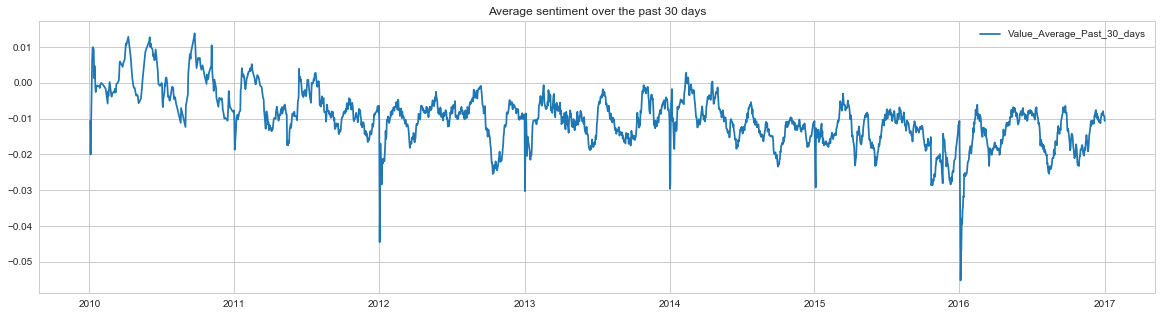

In [77]:
x = df.Date
y= df.Value_Average_Past_30_days
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x, y, linestyle='solid')
plt.legend(loc='best')
plt.title("Average sentiment over the past 30 days")
plt.savefig("Sentiment 30 days.png")

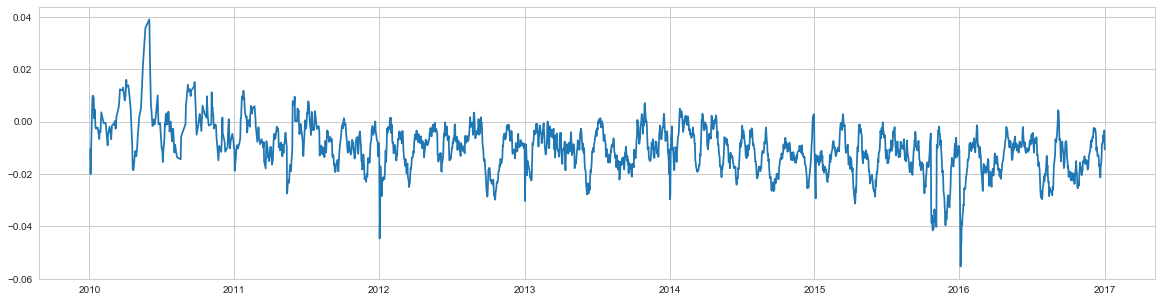

In [54]:
x = df.Date
y= df.Value_Average_Past_14_days
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x, y, linestyle='solid')

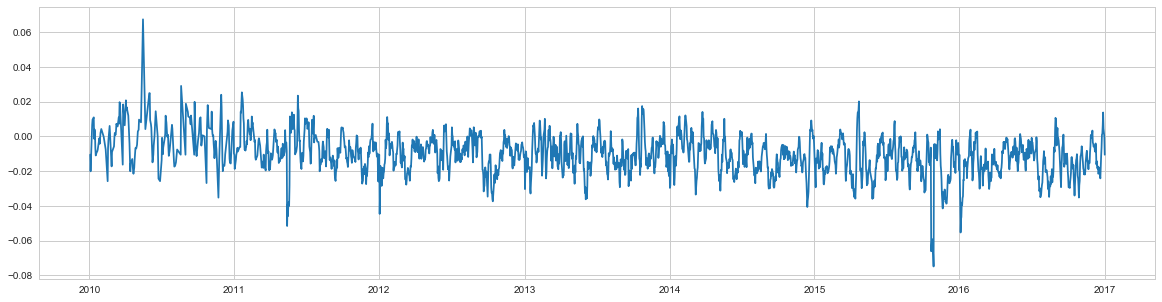

In [55]:
x = df.Date
y= df.Value_Average_Past_7_days
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x, y, linestyle='solid')

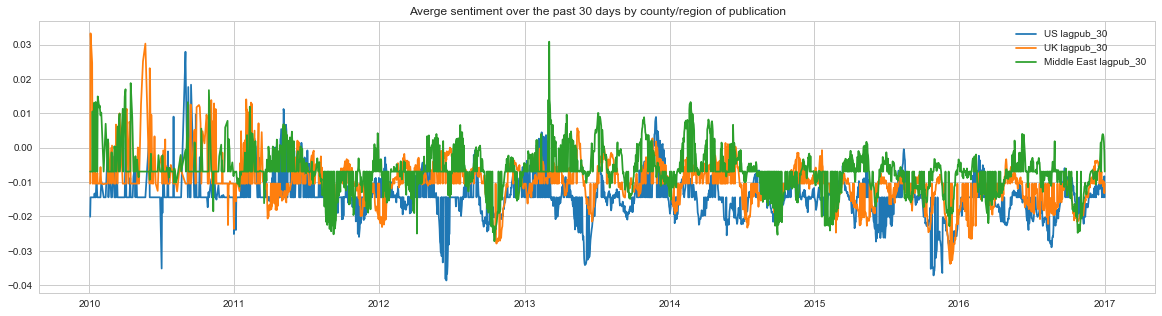

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

x = df.Date
y1= df['US lagpub_30']
plt.plot(x, y1, linestyle='solid')

y2= df['UK lagpub_30']
plt.plot(x, y2, linestyle='solid')

y3= df['Middle East lagpub_30']
plt.plot(x, y3, linestyle='solid')
plt.legend(loc='best')
plt.title("Averge sentiment over the past 30 days by county/region of publication")
plt.savefig("Sentiment by publication region.png")

In [89]:
df2 = df[['FinalRating', 'Value_Average_Past_30_days', 'lag_30','Middle East lagpub_30',
          'UK lagpub_30', 'US lagpub_30']]

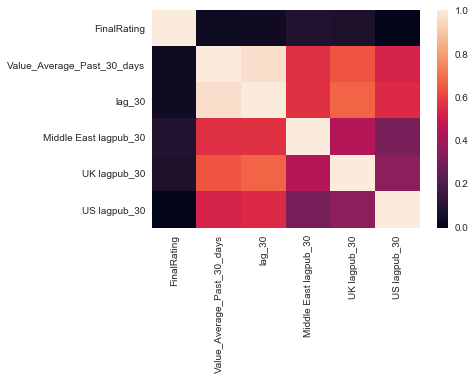

In [90]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [91]:
df3 = df[['FinalRating','Value_Average_Past_14_days', 
        'Middle East lagpub_14', 
       'UK lagpub_14', 'US lagpub_14', ]]

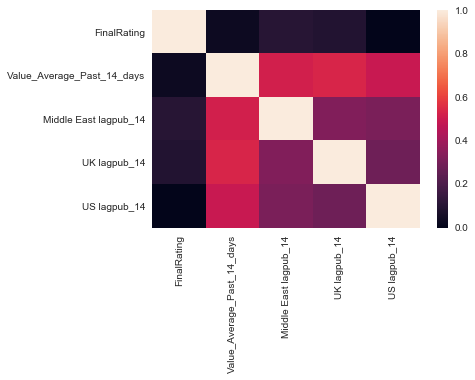

In [92]:
corr = df3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [95]:
df4 = df[[
       'Weekend Flag', 'lag_30','lag_14', 
       'lag_7', 'Middle East lagpub_7', 'UK lagpub_7',
       'US lagpub_7', 'Middle East lagpub_14',
       'UK lagpub_14', 'US lagpub_14', 'Middle East lagpub_30',
       'UK lagpub_30', 'US lagpub_30']]

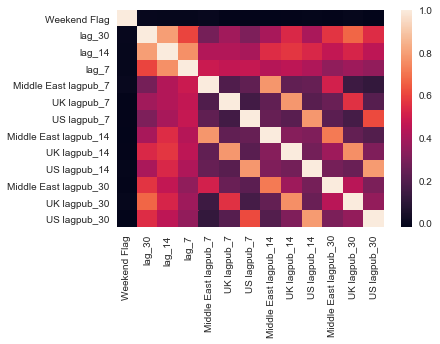

In [96]:
corr = df4.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)